<a href="https://colab.research.google.com/github/JanaAliCS/machine_leanring/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧑‍🏫 Assignment : Online Retail Customer Analytics & Prediction

This Assignment  walks you through a complete applied data science project using online retail data:

- Exploring and aggregating transactional sales data
- Engineering customer-level features (recency, frequency, monetary, returns)
- Building models for **churn prediction**, **tenure prediction**, and **CLV prediction**
- Performing **customer segmentation** using K-Means clustering


> **📌 Important Note:**  
> Several code blocks in this notebook contain **commented code cells** (`# ...`).  
> You are expected to **uncomment and complete these sections** as part of the assignment.  
> These steps are required to successfully finish the notebook and receive full credit.


## Section 0 – Setup
Fill in your details and import the libraries you will need.

In [ ]:
#student_name = 'Jana Ali'

In [1]:
# add required imports here
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel("/content/Sales_Data.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


**👀 Before You Proceed — Explore Your Data Carefully**

Take a moment to inspect the dataset sample shown above.


## Section 1 — Feature Engineering & Data Preparation (30 points)

### ❓ Question: Calculate the Total Price for Each Row — 2 points
Create a new column called **`TotalPrice`** that represents the total revenue for each line item.  
It should be calculated as:

``Quantity * UnitPrice``

Add the column to the dataframe.


In [7]:
df["TotalPrice"] = df['Quantity'] * df['UnitPrice']

# to check
df[['Quantity', 'UnitPrice', 'TotalPrice']].head()

,Quantity,UnitPrice,TotalPrice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


### 📘 Guided Analysis: Which Products Sell the Most?

A key retail question is: *What are our most popular products?*  
To answer this, we use `groupby` to collect all entries of the same product together, then sum their `Quantity` to see total units sold.

By sorting these totals in descending order, we can quickly identify the top-selling items in the store.


In [8]:
# Compute top-selling products
top_products = (
    df.groupby("Description")["Quantity"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

top_products


,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039
WHITE HANGING HEART T-LIGHT HOLDER,35317
RABBIT NIGHT LIGHT,30680
MINI PAINT SET VINTAGE,26437
PACK OF 12 LONDON TISSUES,26315


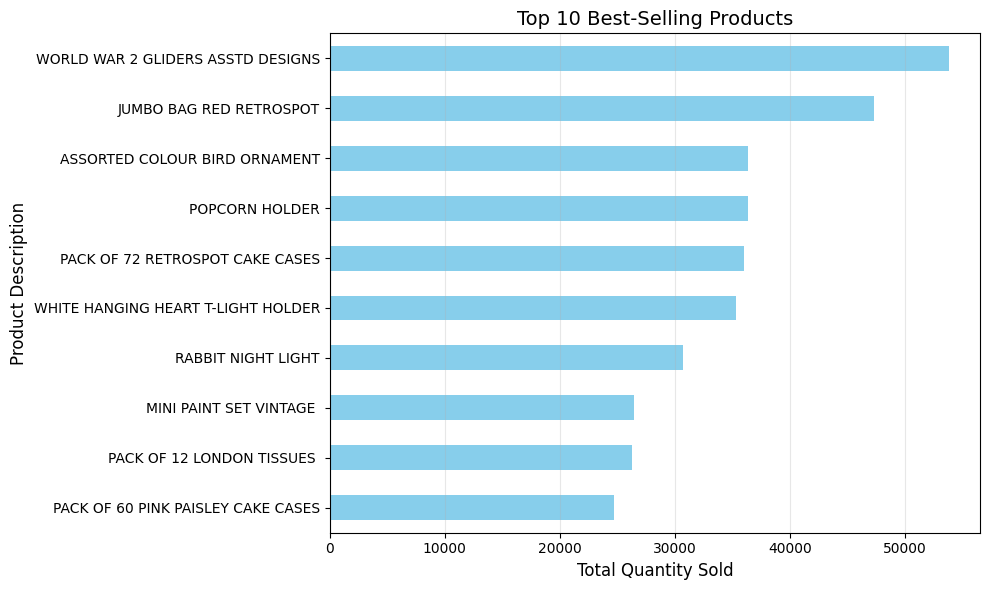

In [9]:
plt.figure(figsize=(10, 6))
top_products.sort_values().plot(kind='barh', color='skyblue')

plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


### ❓ Question: Identify the Top 10 Countries by Revenue — 3 points
Using the `groupby` function, compute the **total revenue generated by each country**.


In [12]:
#total price (q*unit price) == total revenue
top_countries = (
    df.groupby("Country")["TotalPrice"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)
top_countries

,TotalPrice
Country,
United Kingdom,8187806.364
Netherlands,284661.540
EIRE,263276.820
Germany,221698.210
France,197403.900
Australia,137077.270
Switzerland,56385.350
Spain,54774.580
Belgium,40910.960


### 📘 Guided Analysis: Transforming Transaction Data into Invoice-Level Summaries

In the raw dataset, each row represents a **single product line** within an invoice.  
This means one invoice may appear across **multiple rows**, especially when customers buy many different items.

To analyze customer behaviour or total order value, we must **aggregate these individual product lines** into a **single row per invoice**.

To do this, we:
- Group the data by **`InvoiceNo`, `CustomerID`, and `Country`**
- **Sum** the `Quantity` and `TotalPrice` across all items in the invoice  
- **Average** the `UnitPrice` (optional but gives a sense of typical price)  
- Attach the invoice’s **date** by taking the earliest timestamp for that invoice

This transformation converts the dataset from **transaction-level** (many rows per invoice) to **invoice-level** (one row per invoice), making it easier to study order sizes, spending patterns, and customer behaviour.


In [13]:
invoices_df = df.groupby(["InvoiceNo", "CustomerID", "Country"], as_index=False).agg({
    "Quantity": "sum",
    "TotalPrice": "sum",
    "UnitPrice": "mean"
})


In [14]:
invoices_df

,InvoiceNo,CustomerID,Country,Quantity,TotalPrice,UnitPrice
0,536365,17850.0,United Kingdom,40,139.12,3.910000
1,536366,17850.0,United Kingdom,12,22.20,1.850000
2,536367,13047.0,United Kingdom,83,278.73,4.853333
3,536368,13047.0,United Kingdom,15,70.05,4.775000
4,536369,13047.0,United Kingdom,3,17.85,5.950000
...,...,...,...,...,...,...
22185,C581484,16446.0,United Kingdom,-80995,-168469.60,2.080000
22186,C581490,14397.0,United Kingdom,-23,-32.53,1.390000
22187,C581499,15498.0,United Kingdom,-1,-224.69,224.690000
22188,C581568,15311.0,United Kingdom,-5,-54.75,10.950000


In [15]:
invoice_dates = df.groupby("InvoiceNo")["InvoiceDate"].min().reset_index()
invoices_df = invoices_df.merge(invoice_dates, on="InvoiceNo", how="left")

In [16]:
invoices_df

,InvoiceNo,CustomerID,Country,Quantity,TotalPrice,UnitPrice,InvoiceDate
0,536365,17850.0,United Kingdom,40,139.12,3.910000,2010-12-01 08:26:00
1,536366,17850.0,United Kingdom,12,22.20,1.850000,2010-12-01 08:28:00
2,536367,13047.0,United Kingdom,83,278.73,4.853333,2010-12-01 08:34:00
3,536368,13047.0,United Kingdom,15,70.05,4.775000,2010-12-01 08:34:00
4,536369,13047.0,United Kingdom,3,17.85,5.950000,2010-12-01 08:35:00
...,...,...,...,...,...,...,...
22185,C581484,16446.0,United Kingdom,-80995,-168469.60,2.080000,2011-12-09 09:27:00
22186,C581490,14397.0,United Kingdom,-23,-32.53,1.390000,2011-12-09 09:57:00
22187,C581499,15498.0,United Kingdom,-1,-224.69,224.690000,2011-12-09 10:28:00
22188,C581568,15311.0,United Kingdom,-5,-54.75,10.950000,2011-12-09 11:57:00


In [17]:
cutoff = pd.to_datetime("2011-06-01")
# ---------------------------------------------------------
# 📘 Guided Explanation: Why Do We Split Into Past & Future?
#
# In the next steps, we will build models that try to predict
# future customer behaviour — such as churn or CLV.
#
# To mimic a real-world scenario, we must avoid "cheating"
# by accidentally using future information in our features.
#
# Therefore:
# - The PAST dataframe contains all invoices BEFORE the cutoff date
#   → Used for feature engineering (information we would have at prediction time)
#
# - The FUTURE dataframe contains invoices ON or AFTER the cutoff date
#   → Used to build labels (e.g., did the customer return?)
#
# This ensures our models are trained in a *time-aware* way,
# just like they would be deployed in a real business.
# ---------------------------------------------------------

past = invoices_df[invoices_df["InvoiceDate"] < cutoff].copy()
future = invoices_df[invoices_df["InvoiceDate"] >= cutoff].copy()


### ❓ Question: Create Customer-Level Frequency and Monetary Features  — 6 point

Using only the **PAST** dataframe, compute two important customer behaviour metrics:

1. **`customer_freq`**  
   - Group the data by **CustomerID**  
   - Count how many **unique invoices** each customer has  
   - This represents how often the customer has made a purchase

2. **`customer_monetary`**  
   - Group the data by **CustomerID**  
   - Sum the **TotalPrice** across all their past invoices  
   - This represents the total amount the customer has spent

These features will later be used for churn prediction, segmentation, and CLV modelling.


### 📘 Guided Analysis: Calculating Customer Recency

To understand how recently each customer made a purchase, we need to compute their **recency** — the number of days since their last order.

Because we are preparing features for churn prediction, we only look at **past** data (before the cutoff date).  
Here’s the process:

1. **Find each customer’s most recent invoice date**  
   We group the `past` dataframe by `CustomerID` and take the **latest (`max`) `InvoiceDate`**.

2. **Calculate recency in days**  
   We subtract each customer’s last purchase date from the **cutoff date**.  
   This gives us the number of days since their last activity.

Customers with **large recency values** have not purchased for a long time → higher churn risk.  
Customers with **small recency values** purchased recently → more active.


In [24]:
customer_freq = past.groupby("CustomerID")["InvoiceNo"].nunique().rename("customer_freq")
customer_monetary = past.groupby("CustomerID")["TotalPrice"].sum().rename("customer_monetary")

In [25]:
customer_freq

,customer_freq
CustomerID,
12346.0,2
12347.0,3
12348.0,3
12350.0,1
12352.0,8
...,...
18273.0,1
18277.0,1
18280.0,1


In [26]:
customer_monetary

,customer_monetary
CustomerID,
12346.0,0.00
12347.0,1823.43
12348.0,1487.24
12350.0,334.40
12352.0,601.18
...,...
18273.0,51.00
18277.0,-12.75
18280.0,180.60


In [27]:
last_date_past = past.groupby("CustomerID")["InvoiceDate"].max()
recency_days = (cutoff - last_date_past).dt.days

In [28]:
 customers_past  = pd.DataFrame({
     "frequency": customer_freq,
     "monetary": customer_monetary,
     "recency_days": recency_days
 })


In [29]:
customers_past.head()

,frequency,monetary,recency_days
CustomerID,,,
12346.0,2,0.00,133
12347.0,3,1823.43,54
12348.0,3,1487.24,56
12350.0,1,334.40,118
12352.0,8,601.18,70


### ❓ Question: Create the Average Invoice Value Feature — 4 points
As part of our customer feature engineering, we want to compute how much each customer typically spends per invoice.

Using the `monetary` (total spend) and `frequency` (number of invoices) features you created earlier

In [30]:
customers_past["avg_invoice_value"] = customers_past["monetary"] / customers_past["frequency"]

customers_past[["monetary", "frequency", "avg_invoice_value"]].head()

,monetary,frequency,avg_invoice_value
CustomerID,,,
12346.0,0.00,2,0.000000
12347.0,1823.43,3,607.810000
12348.0,1487.24,3,495.746667
12350.0,334.40,1,334.400000
12352.0,601.18,8,75.147500


### 📘 Guided Analysis: Calculating the Return Ratio per Customer

Some customers frequently return items, while others rarely do.  
To capture this behaviour, we create a new feature called **`return_ratio`** — the percentage of a customer’s invoices that were returns.

Here's how we build it:

1. **Identify return invoices**  
   In this dataset, any invoice that begins with the letter **"C"** represents a cancellation or return.  
   We create a new column `is_return` that stores `True` for return invoices and `False` otherwise.

2. **Merge return indicators with the past dataset**  
   We merge the return information back into the `past` dataframe to ensure we only calculate the return ratio using data **before the cutoff date**.

3. **Compute the return ratio per customer**  
   We group by `CustomerID` and take the **mean** of `is_return`.  
   Since `True = 1` and `False = 0`, the mean gives us the **percentage of orders that were returns**.

This feature helps us understand customer reliability and behaviour.  
Customers with a high return ratio may be less profitable or require different marketing strategies.

In [31]:
df["is_return"] = df["InvoiceNo"].astype(str).str.startswith("C")
return_ratio_past = past.merge(
    df[["InvoiceNo", "CustomerID", "is_return"]].drop_duplicates(),
    on=["InvoiceNo", "CustomerID"],
    how="left"
).groupby("CustomerID")["is_return"].mean()



In [33]:
customers_past["return_ratio"] = return_ratio_past

In [34]:
customers_past.head()

,frequency,monetary,recency_days,avg_invoice_value,return_ratio
CustomerID,,,,,
12346.0,2,0.00,133,0.000000,0.500
12347.0,3,1823.43,54,607.810000,0.000
12348.0,3,1487.24,56,495.746667,0.000
12350.0,1,334.40,118,334.400000,0.000
12352.0,8,601.18,70,75.147500,0.375


### ❓ Question: Create a `churned` Label for Each Customer — 7 points
To predict customer churn, we first need to define who *actually* churned.

Using the `future` dataframe (invoices on or after the cutoff date):

1. Identify all customers who **made at least one purchase after the cutoff date** — these customers did **not** churn.
2. For all remaining customers who **did not appear** in the future data, label them as **churned**.

👉 Create a new column called **`churned`**, where:  
- `0` = customer purchased again (active)  
- `1` = customer did **not** purchase after the cutoff (churned)


In [35]:
# customers who did not churn and purchased in future
active_customers = future["CustomerID"].unique()

# if customer is both in future and past -> did not churn -> assign 0
#if customer in past only -> churned -> assign 1
customers_past["churned"] = customers_past.index.to_series().apply(
    lambda x: 0 if x in active_customers else 1
)



In [36]:
### 🧪 Sanity Check: Does Your Churn Label Look Correct?
customers_past["churned"].value_counts(normalize=True)

,proportion
churned,
0,0.712685
1,0.287315


### ❓ Question: Calculate the Total CLV (Customer Lifetime Value) for Each Customer — 8 points

Using the `invoices_df` table, compute how much total revenue each customer has generated across all of their invoices.

1. Group the data by **`CustomerID`**  
2. Sum the **`TotalPrice`** to get the customer's total spending  
3. Store this value in a new column called **`total_clv`** inside `customers_past`  
4. Display summary statistics for the CLV distribution

This will be the target variable for our CLV prediction model.


In [37]:
customer_total_revenue = invoices_df.groupby("CustomerID")["TotalPrice"].sum()

customers_past["total_clv"] = customer_total_revenue

#summary statistics
customers_past["total_clv"].describe()


,total_clv
count,2767.000000
mean,2583.387915
std,10190.687708
min,-1192.200000
25%,374.850000
50%,935.060000
75%,2214.065000
max,279489.020000


In [38]:
### 🧪 Sanity Check: Does Your CLV Look Correct?

print(customers_past["total_clv"].describe())

count      2767.000000
mean       2583.387915
std       10190.687708
min       -1192.200000
25%         374.850000
50%         935.060000
75%        2214.065000
max      279489.020000
Name: total_clv, dtype: float64


### 📘 Guided Analysis: Calculating Customer Tenure

Customer **tenure** represents how long a customer has been active with the business.  
It is a powerful feature for understanding loyalty, retention, and overall customer value.

To calculate tenure, we follow these steps:

1. **Find the first purchase date** for each customer  
   Using `groupby("CustomerID")["InvoiceDate"].min()`, we identify when each customer made their very first order.

2. **Find the last purchase date** for each customer  
   Using `max()`, we capture the most recent time the customer made a purchase.

3. **Compute the tenure**  
   Subtracting the first purchase date from the last purchase date gives us the total number of days a customer has been active.

4. **Store this value** in a new column named `tenure_days` inside `customers_past`.

This feature helps us distinguish **long-term loyal customers** from **new or short-term buyers**, which is valuable for both churn prediction and CLV modelling.


In [39]:
customer_first_purchase = invoices_df.groupby("CustomerID")["InvoiceDate"].min()
customer_last_purchase = invoices_df.groupby("CustomerID")["InvoiceDate"].max()
customer_tenure = (customer_last_purchase - customer_first_purchase).dt.days

In [40]:
customers_past["tenure_days"] = customer_tenure

so higher tenure (customer is long term and more loyal)
while lower tenure (new customer)

## Section 2 – Modelling (45 points)

### Section 2.1 – Customer Churn Prediction (Classification)  — 20 points

In this section, you will build **classification models** to predict whether a customer will churn (`churned = 1`) or stay active (`churned = 0`).

You will work with the features you created earlier, such as:

- `recency_days`
- `frequency`
- `monetary`
- `avg_invoice_value`
- `return_ratio`

---

### ❓ Task: Train and Evaluate Churn Models

Using the `customers_past` dataframe:

1. **Define your feature matrix `X` and target vector `y`**
   - `X` should contain the numerical customer features (e.g., `recency_days`, `frequency`, `monetary`, `avg_invoice_value`, `return_ratio`).
   - `y` should be the `churned` column.

2. **Split the data** into training and test sets using `train_test_split`.
   - Use `test_size=0.2` and a fixed `random_state` (e.g., 42).
   - Use `stratify=y` to keep the churn ratio similar in train and test sets.

3. **Train two models:**
   - A **Logistic Regression** model (`LogisticRegression` from `sklearn.linear_model`).
   - An **XGBoost classifier** (`XGBClassifier` from `xgboost`).

4. **Evaluate both models** on the test set:
   - Print the **classification report** (`classification_report`) for each model.
   - Comment on **precision, recall, and F1-score** for the churned class (`1`).

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

In [43]:
#defining features (x and y)
X = customers_past[["frequency", "monetary", "recency_days", "avg_invoice_value", "return_ratio"]]
y = customers_past["churned"]

#splitting train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [48]:
#logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression: ")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression: 
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       395
           1       0.37      0.16      0.23       159

    accuracy                           0.68       554
   macro avg       0.55      0.52      0.51       554
weighted avg       0.62      0.68      0.63       554



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
#xgboost

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluation
print("XGBoost Classifier: ")
print(classification_report(y_test, y_pred_xgb, digits=4))

XGBoost Classifier: 
              precision    recall  f1-score   support

           0     0.7488    0.8076    0.7771       395
           1     0.4062    0.3270    0.3624       159

    accuracy                         0.6697       554
   macro avg     0.5775    0.5673    0.5697       554
weighted avg     0.6505    0.6697    0.6581       554



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:07:03] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Comment on classification report for (1):
- For the logistic regression results, class 1:
  1. precision: of all customers predicted as churned only 37% actually churned.
  2. recall: of all actual customers that churned only 16% were were correctly identifed.
  3. F1-score is 0.23 which shows the overall quality of predictions regarding class 1 by combining the results of precision and recall. Thus, this 0.23 shows **poor** quality in predicting class 1.

- For the XGBoost results, class 1:
  1. precision: of all customers predicted as churned only 41% actually churned (slightly better than logistic regression).
  2. recall: of all actual customers that churned only 32% were were correctly identifed (much better than logistic regression)
  3. F1-score is 0.36 so overall xgboost was better than the 0.23 of logistic regression but still both are not doing a good job in predicting class 1 which might be because of class imbalance if too little in the original dataset are actually churned then it might be hard for the models to be able to identify correctly as it might mostly generalize to the class that occurs alot (class 0).  

### Section 2.2 – Handling Class Imbalance (Weighted Models) — 10 points

In many real churn problems, the dataset is **imbalanced**:
- Most customers **do not churn**
- A smaller fraction actually **churn**

If we ignore this, models may learn to always predict the majority class and still get “good” accuracy, while completely failing at detecting churners (the class we care about most).

In this section, you will **rebuild the same two models** as in Section 2.1, but this time you will make them **aware of class imbalance**.


### ❓ Question 1: Train a Balanced Logistic Regression Model
Rebuild your Logistic Regression model so that it correctly handles class imbalance.

To do this, set the parameter: class_weight="balanced"

Train the model on your training set and then:

- Print the **classification report**


In [50]:
# Balanced Logistic Regression
log_reg_balanced = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight="balanced"
)

# using scaled training data from before
log_reg_balanced.fit(X_train_scaled, y_train)

# make predictions on scaled test set from before
y_pred_logreg_bal = log_reg_balanced.predict(X_test_scaled)

# evaluation
print("Balanced Logistic Regression: ")
print(classification_report(y_test, y_pred_logreg_bal, digits=4))


Balanced Logistic Regression: 
              precision    recall  f1-score   support

           0     0.8571    0.5165    0.6445       395
           1     0.3956    0.7862    0.5263       159

    accuracy                         0.5939       554
   macro avg     0.6264    0.6513    0.5854       554
weighted avg     0.7247    0.5939    0.6106       554




### ❓ Question 2: Train a Balanced XGBoost Classifier
XGBoost handles class imbalance using the parameter: scale_pos_weight = 'your computed value'

Train the model and then:

- Print the **classification report**


In [51]:
 ## Inspect the Class Distribution (Required for XGBoost Classifier)

 from collections import Counter

 counter = Counter(y_train)
 print(counter)

 neg = counter[0]   # non-churners
 pos = counter[1]   # churners

 scale_pos_weight = neg / pos
 print("scale_pos_weight:", scale_pos_weight)


Counter({0: 1577, 1: 636})
scale_pos_weight: 2.479559748427673


In [52]:
#balanced xgboost
xgb_balanced = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    scale_pos_weight=scale_pos_weight
)

xgb_balanced.fit(X_train, y_train)

y_pred_xgb_bal = xgb_balanced.predict(X_test)

# Classification report
print("Balanced XGBoost Classifier: ")
print(classification_report(y_test, y_pred_xgb_bal, digits=4))

Balanced XGBoost Classifier: 
              precision    recall  f1-score   support

           0     0.7635    0.6456    0.6996       395
           1     0.3636    0.5031    0.4222       159

    accuracy                         0.6047       554
   macro avg     0.5636    0.5744    0.5609       554
weighted avg     0.6487    0.6047    0.6200       554



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:30:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


⭐ (Bonus – 3 pts): Select the Best Churn Model for the Business

Based on your results, choose one model that the business should deploy for churn prediction. Then explain:

Why this model is the best choice, referring to the most relevant evaluation metric(s).

How the business can use this model’s churn predictions to target at-risk customers with appropriate retention actions.

How you would report this model’s accuracy to non-technical stakeholders in a simple and meaningful way.

ANSWER: The best churn model is chosen by comparing the results of the classification report for both models specifically for class 1. Accordingly, the balanced logistic regression has a better recall, precision and f1-score for class 1 than xgboost. For instance, the most important metrics that identifies at risk customers of churning is the recall and its especially higher for the logistic regression (0.7862) than that if the xgboost (0.5031). Thus, balanced logistic regression is better in this case.

### ❓ Section 2.3 – Tenure Prediction Using Linear Regression — 7 points

In this section, you will build your first regression model.

A customer’s **tenure** represents how long (in days) they remained active between their first and last purchase.  
Your task is to use the engineered features to **predict a customer's tenure**.

---

### ❓ Question: Build a Linear Regression Model for Tenure Prediction

Using the same customer features as before (`frequency`, `monetary`, `recency_days`, `avg_invoice_value`, `return_ratio`):

1. Prepare a new dataframe containing:
   - The regression features  
   - The target column `tenure_days`

2. Split the data into training and testing sets (`test_size=0.2`).

3. Train a **Linear Regression** model to predict `tenure_days`.

4. Evaluate the model by printing:
   - **Mean Absolute Error (MAE)**  
   - **Mean Squared Error (MSE)**  

### ❓ Section 2.4 – Customer Lifetime Value (CLV) Prediction Using a Neural Network — 8 points

Customer Lifetime Value (CLV) represents the **total revenue** each customer generates over their entire relationship with the business.  
In this section, you will use a **Neural Network (MLPRegressor)** to predict a customer’s CLV based on the behavioural features you engineered earlier.

---

### ❓ Question: Build a Neural Network Model to Predict CLV

Using the features  
`frequency`, `monetary`, `recency_days`, `avg_invoice_value`, and `return_ratio`:

1. Prepare a dataframe containing these features plus the target column `total_clv`.  
2. Split the data into training and testing sets (`test_size = 0.2`, `random_state = 42`).  
3. Build and train a **Neural Network regression model (`MLPRegressor`)**.  
   - Use at least one hidden layer  
   - Recommended activation: `"relu"`  
   - Use `max_iter` large enough (e.g., 300–500)  
4. Evaluate the model by printing:
   - **Mean Absolute Error (MAE)**  
   - **Mean Squared Error (MSE)**  

⭐ Bonus – 3 pts: Using CLV Predictions for Business Decisions

Your neural network model predicts each customer’s Customer Lifetime Value (CLV).
Explain how the business can use these predicted CLV values to make better decisions. In your answer, describe:

Which customers should be prioritized for retention or loyalty campaigns based on predicted CLV.

How CLV predictions can guide marketing spend, such as deciding which customers justify higher acquisition or retention costs.

How the company could use CLV to forecast future revenue or identify high-value customer segments.

## ❓ Section 3 – Customer Segmentation with K-Means (25 points)


Using the features `recency_days`, `frequency`, and `monetary`, perform the full K-Means clustering workflow as described below:

1. **Prepare the data for clustering**  
   - Create a new dataframe containing only the three clustering features  
   - Apply `StandardScaler` to standardize all features  
   *(Because K-Means is distance-based, scaling is required to ensure equal weight for all features.)*

2. **Determine the optimal number of clusters (K) using the Elbow Method**  
   - Loop through values of K from **1 to 10**  
   - Fit a `KMeans` model for each K  
   - Store the inertia (SSE) values  
   - Plot the Elbow Curve (`K` vs. `inertia`)  
   - Choose the best K where the curve begins to flatten

3. **Fit the K-Means model using your chosen K**  
   - Train the final `KMeans` model  
   - Assign each customer to a cluster  
   - Store the result in a new column `cluster_kmeans` in `customers_past`

Complete all three steps above to segment customers based on their purchase behavior.

### ❓ Question: Build the Final K-Means Model (K = 4) and Interpret the Segments

Assume that the optimal number of clusters is **K = 4**.

1. **Fit a new K-Means model** using `n_clusters=4` and assign each customer a cluster label.  
2. **Inspect the mean values** of the three clustering features (`recency_days`, `frequency`, `monetary`) for each cluster by using `groupby("cluster_kmeans").mean()`.  
3. Based on these averages, **assign meaningful names** to each cluster. Choose from (or create your own):  
   - *Frequent, good spenders, loyal*  
   - *Extremely recent, very high spend*  
   - *Low-frequency shoppers*  
   - *Rare purchases, long recency, low spend*  

4. **Explain why** you matched each cluster with its chosen name.

Your goal is to translate numerical cluster patterns into **real customer personas** that a marketing or CRM team can understand.


### 📘 Guided Analysis: Visualizing Clusters with PCA

So far, we’ve used K-Means to assign each customer to a cluster based on their **recency**, **frequency**, and **monetary** behavior.  
However, these features live in a multi-dimensional space, which is hard to visualize directly.

To make the clusters easier to see, we use **PCA (Principal Component Analysis)** to:

1. **Reduce the scaled feature space to 2 dimensions**
   - PCA creates new axes (components) that capture as much variance in the data as possible.
   - We keep only the first two components so we can plot the data in 2D.

2. **Plot each customer as a point in this 2D space**
   - Each point represents a customer.
   - The color indicates which `cluster_kmeans` they belong to.

This visualization helps us answer questions like:
- Are the clusters clearly separated or overlapping?
- Do some clusters appear more compact and well-defined than others?
- Are there small or sparse clusters that might represent special customer types (e.g., VIPs)?

Remember:  
PCA is only a **visualization tool here** — clustering was already done in the original feature space; we’re just projecting it into 2D so we can see the structure.


In [ ]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Reduce to 2D for visualization
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# plt.figure(figsize=(8, 6))

# plt.scatter(
#     X_pca[:, 0], X_pca[:, 1],
#     c=customers_past["cluster_kmeans"],
#     cmap="viridis", alpha=0.6, edgecolors='k'
# )

# plt.title("K-Means Clustering (PCA 2D Projection)", fontsize=14)
# plt.xlabel("PCA Component 1", fontsize=12)
# plt.ylabel("PCA Component 2", fontsize=12)
# plt.grid(alpha=0.3)

# plt.tight_layout()
# plt.show()
